In [244]:
%matplotlib inline

from keras import backend as K
from keras.callbacks import TensorBoard
from keras import objectives, regularizers
from keras.datasets import mnist
from keras.layers import Input, Dense, GaussianNoise, Lambda, Activation
from keras.models import Model, Sequential

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
sns.set_style("dark")

from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from scipy import io

from keras.datasets import mnist
from keras.activations import softmax

from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam

from keras.regularizers import Regularizer

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

 7208960/11490434 [=================>............] - ETA: 0s

In [4]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [250]:
# information dimension regularization penalty
def id_reg(act):
    lam = 1e-3
    p = softmax(act, axis=-1)
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

In [ ]:
# Model 1
batch_size = 400
latent_dim = 2
epochs = 3
lr = 0.001

input_dim = x_train.shape[1]

input_layer = Input(shape=(input_dim,))
c = BatchNormalization(scale=False)(input_layer)
c = Dense(1024, activation='relu',activity_regularizer=id_reg)(c)
e = BatchNormalization(scale=False)(c)
e = GaussianNoise(0.5)(e)
e = BatchNormalization(scale=False)(e)
e = Dense(512, activation='relu')(e)
e = BatchNormalization(scale=False)(e)
e = Dense(256, activation='relu')(e)
e = BatchNormalization(scale=False)(e)
e = Dense(latent_dim, activation='linear')(e)
e = BatchNormalization(scale=False)(e)
d = Dense(256, activation='relu')(e)
d = BatchNormalization(scale=False)(d)
d = Dense(512, activation='relu')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(1024, activation='relu')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(input_dim, activation='sigmoid')(d)

autoencoder = Model(inputs=input_layer, outputs=d)
encoder = Model(inputs=input_layer, outputs=e)
cluster = Model(inputs=input_layer, outputs=c)

In [285]:
# Model 2
batch_size = 400
latent_dim = 2
epochs = 3
lr = 0.001

def id_reg1(act):
    lam = 1e-6
    p = softmax(act, axis=-1)
    H = -K.sum(p * K.log(p + 1e-9))
    return lam * H

input_dim = x_train.shape[1]

input_layer = Input(shape=(input_dim,))
e = BatchNormalization(scale=False)(input_layer)
e = Dense(1024, activation='relu',activity_regularizer=id_reg1)(e)
e = BatchNormalization(scale=False)(e)
e = Dense(512, activation='relu')(e)
e = BatchNormalization(scale=False)(e)
e = Dense(256, activation='relu')(e)
e = BatchNormalization(scale=False)(e)
e = Dense(latent_dim, activation='linear')(e)
d = BatchNormalization(scale=False)(e)
d = Dense(256, activation='relu')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(512, activation='relu')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(1024, activation='relu')(d)
d = BatchNormalization(scale=False)(d)
d = Dense(input_dim, activation='sigmoid')(d)

autoencoder = Model(inputs=input_layer, outputs=d)
encoder = Model(inputs=input_layer, outputs=e)

In [286]:
# Train
adam = Adam(lr=lr)
autoencoder.compile(optimizer=adam, loss='binary_crossentropy')
autoencoder.fit(x_train, x_train,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                verbose=1,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 15s - loss: 0.3480 - val_loss: 0.2699s: 
Epoch 2/3
60000/60000 [==============================] - 11s - loss: 0.1879 - val_loss: 0.2509
Epoch 3/3
60000/60000 [==============================] - 11s - loss: 0.1820 - val_loss: 0.2055s:


In [287]:
x_train_encoded = encoder.predict(x_train, batch_size=batch_size)

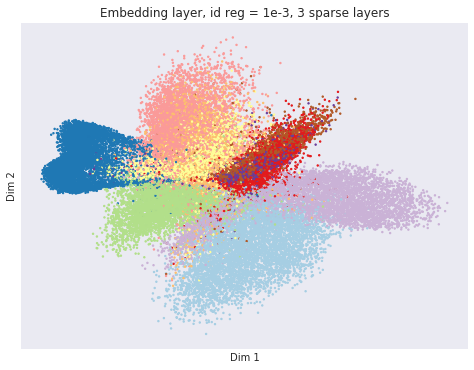

In [260]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-5, 1e-2, 2 sparse layers")
plt.show()

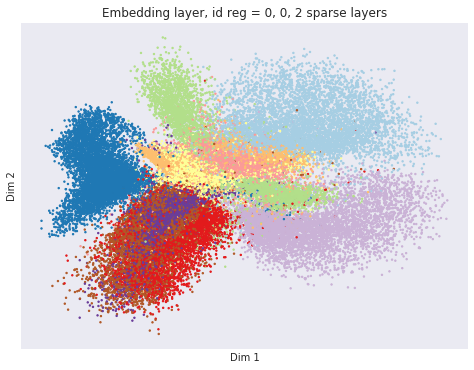

In [264]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 0, 0, 2 sparse layers")
plt.show()

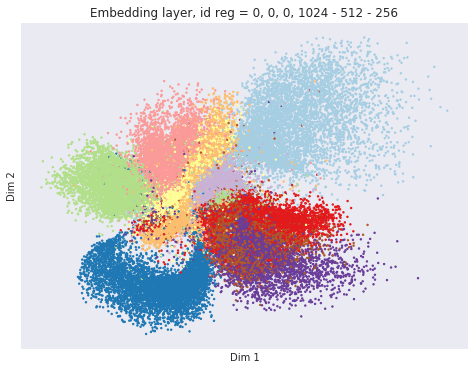

In [276]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 0, 0, 0, 1024 - 512 - 256")
plt.show()

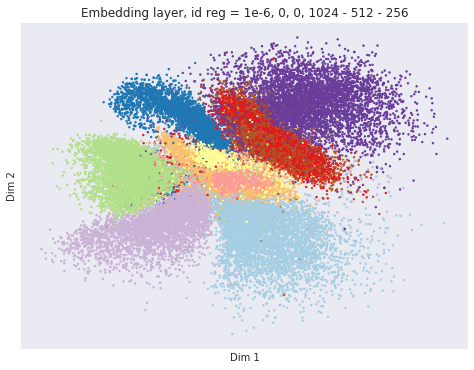

In [288]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.setp(ax, xticks=[], yticks=[])
ax.scatter(x_train_encoded[:,0], x_train_encoded[:,1], s=2, c=y_train, cmap="Paired")
ax.set_xlabel("Dim 1")
ax.set_ylabel("Dim 2")
ax.set_title("Embedding layer, id reg = 1e-6, 0, 0, 1024 - 512 - 256")
plt.show()